In [36]:
import numpy as np
import random

from net.layer import Layer
from net.network import Network
from net.activation_functions import sigmoid
from net.back_propogation import BackPropagation
import matplotlib.pyplot as plt

## Создадим нейронную сеть

In [37]:
# Определим слои:
# - входной, который будет принимать побитовое представление числа.
# - выходной, который выводит четное или нечетное число.
layers = [Layer(n_neurons=8, type="in"),
          Layer(n_neurons=1, type='out', f_activation=sigmoid)]

In [38]:
# Определим сеть из слоев
net = Network(layers)
# Выберем в качестве оптимизатора, алгоритм обратного распростронения
solver = BackPropagation(net)

## Cоздание выборки

In [39]:
# Количество сэмплов
n = 100
# 8 битами можно записать числа от 0 до 255
X = [random.randint(0,255) for _ in range(n)]
X[:5]

[1, 96, 135, 216, 12]

In [40]:
# Функция перевода числа в битовый вид
def int2bin(x):
    # Бинаризуем числа, первые два символа означают кодировку, 
    # поэтому их учистывать не будем
    x_str = bin(x)[2:]
    # Если количество символов не 8, добавим незначащие нули
    n_char = len(x_str)
    if n_char < 8:
        x_str = '0'*(8 - n_char) + x_str
    # Из строки в массив, поэлементно
    x_str_list = list(x_str)
    # Из строки в целое число
    x_int_list = list(map(int, x_str_list))
    return x_int_list

In [41]:
X = list(map(int2bin, X))
X[:5]

[[0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 1, 1],
 [1, 1, 0, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 1, 0, 0]]

In [42]:
# Сгенерируем ответы
# Последний бит указывает на четность
y = list(map(lambda x: x[7], X))
# 0 - четное, 1 нечетное
y[:5]

[1, 0, 1, 0, 0]

In [43]:
# Важный момент, сеть работает только с массивами numpy
# Трансформируем list в numpy array
X = np.array(X)
y = np.array(y)
X.resize(n, 8)
y.resize(n, 1)

## Тренировка сети

In [44]:
# пройдем по всем данным n_epoch раз 
solver.fit(X, y, n_epoch=100)

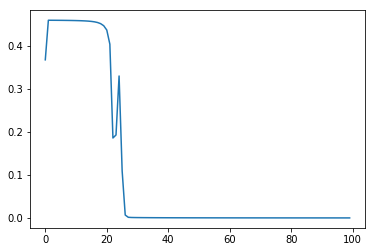

In [45]:
# Построим график ошибки, от эпохи, как мы видим, уже после нескольких десятков эпох,
# алгоритм сошелся
losses = solver.get_loss()
plt.plot(losses)
plt.show()

In [46]:
# Предсказание четности 
def predict_odd_or_even(predictor, xs):
    # выбор режим, для предсказание точности  одного числа или
    # нескольких
    if type(xs) is list:
        X_bin = list(map(int2bin, xs))
    else:
        X_bin = [int2bin(xs)]
    answers = predictor.predict(X_bin)
    # если 0 то четное, если 1 то нечетное,
    # выберем то, до которого ближе
    for answer, x in zip(answers, xs):
        if answer < 0.5:
            print(f"число {x} - четное")
        else:
            print(f"число {x} - нечетное")
    

In [47]:
# Проверим правильность предсказания
predict_odd_or_even(solver, [53, 2, 5])

число 53 - нечетное
число 2 - четное
число 5 - нечетное


In [48]:
# Посмотрим на веса
solver.get_weights()

[array([[ -1.8784986 ],
        [ -2.55059367],
        [ -0.3950234 ],
        [ -0.1436387 ],
        [ -2.12206404],
        [ -2.83231576],
        [ -0.34777837],
        [ 13.47074317],
        [ -0.64352752]])]

Первые 8 весов, это коэфициент перед входным нейроном, а последний это свободный вес смещения.
Как мы видим, коэфициент при 8 бите гораздо больше остальных. 